In [1]:
from skimage.feature import local_binary_pattern

In [2]:
import numpy as np

In [3]:
import pandas as pd

import scipy.io

YB = scipy.io.loadmat('YaleB_32x32.mat')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [7]:
20*38/2414

0.3148301574150787

In [8]:
fea = YB['fea']

In [9]:
gnd = YB['gnd']

In [177]:
# Repeat the above procedure 10,20,30,40,50 training images 
#per person for k = 1,2,3,5,10 and plot the error rate E against k.

#
Error = []
m_vec = [0.84, 0.68, 0.528, 0.37, 0.213]
for m in m_vec:
    X_train, X_test, y_train, y_test = train_test_split(fea, gnd, test_size = m, random_state = 1, stratify = gnd)
    
    y_train_list = []
    for i in y_train:
        y_train_list.append(int(i))
    y_train_list = np.array(y_train_list)

    y_test_list = []
    for i in y_test:
        y_test_list.append(int(i))
    y_test_list = np.array(y_test_list)
    
    Error_k =[]
    for k in [1,2,3,5,10]:
        knn_model = knn(n_neighbors = k)
        knn_model.fit(X_train, y_train_list)
        y_predict = knn_model.predict(X_test)
        error = ((sum(y_test_list != y_predict))/(y_test_list.shape[0])) * 100
        Error_k.append(error)
    Error.append(Error_k)
        

In [178]:
Total_Error = []
for k in [1,2,3,5,10]:
    #1. Split Data Set
    m_vec = [0.84, 0.68, 0.528, 0.37, 0.213]
    
    Sub_Total_Error = []
    for m in m_vec:
        X_train, X_test, y_train, y_test = train_test_split(fea, gnd, test_size = m, random_state = 1, stratify = gnd)
        
        #change format of y_test, y_train
        y_train_list = []
        for i in y_train:
            y_train_list.append(int(i))
        y_train_list = np.array(y_train_list)
        
        y_test_list = []
        for i in y_test:
            y_test_list.append(int(i))
        y_test_list = np.array(y_test_list)
        
        knn_model = knn(n_neighbors = k)
        knn_model.fit(X_train, y_train_list)
        
        y_predict = knn_model.predict(X_test)
        error = 100*(sum(y_predict != y_test_list) / len(y_test_list))
        Sub_Total_Error.append(error)
        
    Total_Error.append(Sub_Total_Error)
        
        
    
    

In [170]:
Total_Error

[[5.818540433925049,
  1.8879415347137638,
  0.7058823529411765,
  0.22371364653243847,
  0.1941747572815534],
 [13.560157790927022,
  4.506699147381242,
  2.431372549019608,
  0.33557046979865773,
  0.1941747572815534],
 [12.82051282051282,
  3.5322777101096223,
  1.8823529411764703,
  0.22371364653243847,
  0.1941747572815534],
 [14.842209072978305,
  3.5931790499390983,
  1.4901960784313726,
  0.44742729306487694,
  0.1941747572815534],
 [20.266272189349113,
  5.237515225334957,
  2.03921568627451,
  0.33557046979865773,
  0.1941747572815534]]

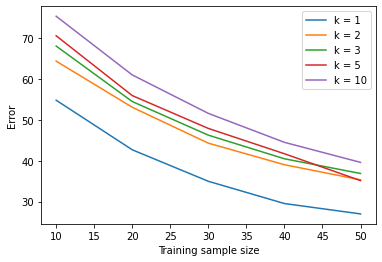

In [179]:
s = [10,20,30,40,50]
g = [1,2,3,5,10]
for i in range(len(Total_Error)):
    t = 'k = '+str(g[i])
    plt.plot(s, Total_Error[i], label = t)
plt.xlabel('Training sample size')
plt.ylabel('Error')
plt.legend()

In [180]:
a = y_test_list != y_predict
index = np.where(a == 1)

In [181]:
index

(array([  1,   4,   8,  12,  15,  20,  28,  31,  32,  35,  41,  43,  44,
         45,  47,  49,  50,  53,  55,  59,  62,  63,  69,  70,  73,  76,
         77,  78,  79,  81,  83,  84,  86,  87,  89,  90,  93,  99, 105,
        108, 110, 113, 115, 118, 119, 126, 127, 128, 134, 135, 142, 143,
        144, 145, 146, 148, 153, 154, 155, 160, 162, 163, 177, 179, 183,
        185, 187, 188, 189, 191, 192, 194, 199, 202, 203, 204, 205, 213,
        215, 216, 219, 220, 222, 225, 226, 228, 229, 231, 232, 233, 240,
        242, 243, 244, 248, 249, 251, 253, 256, 258, 263, 266, 267, 270,
        271, 274, 276, 277, 278, 281, 282, 285, 288, 289, 294, 299, 300,
        301, 302, 303, 304, 305, 310, 311, 318, 319, 320, 324, 326, 327,
        331, 333, 335, 337, 347, 351, 357, 360, 362, 364, 366, 368, 370,
        371, 372, 373, 374, 376, 379, 386, 388, 389, 390, 391, 394, 395,
        396, 397, 398, 399, 400, 407, 413, 414, 416, 422, 426, 427, 428,
        430, 431, 434, 436, 440, 442, 446, 448, 449

In [182]:
print(y_test_list[1])
print(y_predict[1])

22
8


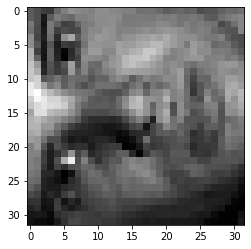

In [183]:
real_img = X_test[22,:].reshape(32,32)
plt.imshow(real_img, cmap = 'gray')

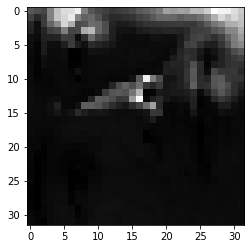

In [184]:
predict_image = X_test[8,:].reshape(32,32)
plt.imshow(predict_image, cmap = 'gray')

In [189]:
fea = YB['fea']
gnd = YB['gnd']
X_train, X_test, y_train, y_test = train_test_split(fea, gnd, test_size = 0.315, random_state = 1, stratify = gnd)

y_train_list = []
for i in y_train:
    y_train_list.append(int(i))
y_train_list = np.array(y_train_list)

y_test_list = []
for i in y_test:
    y_test_list.append(int(i))
y_test_list = np.array(y_test_list)
#2. Train Validation Split

X_t_train, X_t_validation, y_t_train, y_t_validation = train_test_split(X_train, y_train_list, test_size = 0.2, random_state = 1, stratify = y_train)


In [194]:
len(y_t_validation)

331

In [195]:
#3. Find the optimal parameters KNN (K = 1,2,3,5,10) (p = 1,3,5,10)
k_list = [1,2,3,5,10]
p_list = [1,3,5,10]

Total_Validation_Error = []
for k in k_list:
    
    sub_error = [] #records errors for each p values for this k
    
    for i in p_list:
        knn_model = knn(n_neighbors = k, p = i)
        knn_model.fit(X_t_train, y_t_train)
        y_t_prediction = knn_model.predict(X_t_validation)
        
        error = 100*(sum(y_t_prediction != y_t_validation) / len(y_t_validation))
        sub_error.append(error)
        
    Total_Validation_Error.append(sub_error)
        

In [196]:
Total_Validation_Error

[[38.066465256797585,
  27.19033232628399,
  25.377643504531722,
  35.64954682779456],
 [47.43202416918429, 35.64954682779456, 35.04531722054381, 40.483383685800604],
 [47.43202416918429, 38.066465256797585, 36.25377643504532, 41.99395770392749],
 [46.22356495468278,
  39.577039274924466,
  40.181268882175225,
  49.244712990936556],
 [47.43202416918429, 41.99395770392749, 44.41087613293052, 54.0785498489426]]

In [197]:
min_list = []
for i in Total_Validation_Error:
    min_list.append(min(i))

In [198]:
min_list

[25.377643504531722,
 35.04531722054381,
 36.25377643504532,
 39.577039274924466,
 41.99395770392749]

In [199]:
#4. by observing min_list k = 1 , p = 5 is the optimal parameters

knn_model = knn(n_neighbors = 1, p = 5)
knn_model.fit(X_train, y_train_list)

y_predict = knn_model.predict(X_test)

error_test = 100*(sum(y_predict != y_test_list)/len(y_test_list))

In [200]:
error_test

23.915900131406044

# PCA

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [11]:
fea = YB['fea']
gnd1 = YB['gnd']
gnd = []
for i in gnd1:
    gnd.append(int(i)) 
gnd = np.array(gnd)
m_vec = [0.84, 0.68, 0.528, 0.37, 0.213]
Total_error = []

In [21]:

scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(fea)

# 95% of Variance
pca = PCA(n_components = 0.8)
pca.fit(data_rescaled)
reduced_fea = pca.transform(data_rescaled)

In [22]:
reduced_fea.shape

(2414, 5)

In [14]:
from scipy.io import savemat

In [23]:
np.savetxt('PCA_YB.csv', reduced_fea)

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as knn

In [217]:
X_train, X_test, y_train, y_test = train_test_split(reduced_fea, gnd, test_size = 0.2, random_state = 1, stratify = gnd)

In [221]:

Error_PCA = []
for i in m_vec:
    X_train, X_test, y_train, y_test = train_test_split(reduced_fea, gnd, test_size = i, random_state = 1, stratify = gnd)
    K = knn(n_neighbors = 3)
    K.fit(X_train, y_train)
    
    y_predict = K.predict(X_test)
    
    error = 100 * (sum(y_predict != y_test) / len(y_test))
    
    Error_PCA.append(error)


In [222]:
Error_PCA

[70.71005917159763,
 60.53593179049939,
 52.54901960784314,
 47.87472035794183,
 42.52427184466019]

In [234]:
Total_error.append(Error_PCA)

In [224]:
#2 LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [229]:

Error_LDA = []
for i in m_vec:
    X_train, X_test, y_train, y_test = train_test_split(fea, gnd, test_size = i, random_state = 1, stratify = gnd)
    L_model  =LDA()
    L_model.fit(X_train, y_train)

    y_predict = L_model.predict(X_test)

    error = 100 * (sum(y_predict != y_test)/len(y_test))
    Error_LDA.append(error)

In [230]:
Error_LDA

[23.86587771203156,
 13.276492082825822,
 19.84313725490196,
 7.38255033557047,
 4.854368932038835]

In [235]:
Total_error.append(Error_LDA)

In [237]:
#3. SVM
from sklearn.svm import SVC

Error_SVM = []
for i in m_vec:
    X_train, X_test, y_train, y_test = train_test_split(fea, gnd, test_size = i, random_state = 1, stratify = gnd)
    model  =SVC()
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)

    error = 100 * (sum(y_predict != y_test)/len(y_test))
    Error_SVM.append(error) 

In [238]:
Error_SVM

[66.37080867850098,
 44.0925700365408,
 32.470588235294116,
 21.476510067114095,
 17.475728155339805]

<function matplotlib.pyplot.legend(*args, **kwargs)>

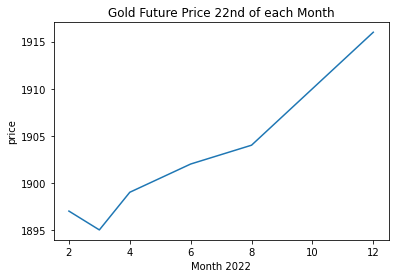

In [243]:
a = [1897,1895,1899,1902,1904,1910,1916]#,1925,1933,1937,1940,1943]
b = [2,3,4,6,8,10,12]

plt.plot(b,a)
plt.title('Gold Future Price 22nd of each Month')
plt.xlabel('Month 2022')
plt.ylabel('price')
plt.legend

Text(0.5, 1.0, 'Trading Volume')

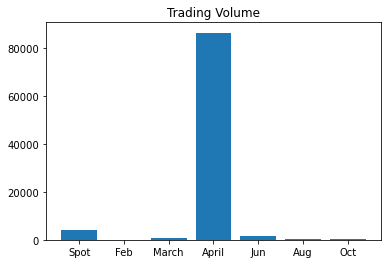

In [245]:
a = [4181,81,740,86344,1646,371,340]
b = ['Spot', 'Feb', 'March', 'April', 'Jun', 'Aug', 'Oct' ]
plt.bar(b,a)
plt.title('Trading Volume')